**Main task of research**
> Define features that most affects on ratings

# **Data preparation**

Import libraries that we use to prepare and visualize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
table = pd.read_csv('test.csv')

In [3]:
table.head()

,Unnamed: 0,Title,Year,Country,Genre,IMDb rating,Kinopoisk rating,Duration,Link
0,0,Побег из Шоушенка,1994,США,"['Драмы', 'Криминал']",9.3,9.11,142 мин.,https://rezka.ag/films/drama/806-pobeg-iz-shou...
1,1,Зеленая миля,1999,США,"['Драмы', 'Детективы', 'Фэнтези', 'Криминал']",8.6,9.06,189 мин.,https://rezka.ag/films/drama/825-zelenaya-mily...
2,2,Милен Фармер,2009,Франция,['Документальные'],8.9,9.04,139 мин.,https://rezka.ag/films/documentary/13567-mylne...
3,3,Шестой концертный тур Милен Фармер,2013,Франция,['Музыкальные'],9.0,8.95,120 мин.,https://rezka.ag/show/musical/3153-shestoy-kon...
4,4,Концерт Милен Фармер в Берси,1997,Франция,"['Документальные', 'Биографические']",9.2,8.93,120 мин.,https://rezka.ag/films/documentary/14598-konce...


In [4]:
#delete column named 'Unnamed: 0'
del table['Unnamed: 0']

In [5]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27239 entries, 0 to 27238
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             27239 non-null  object 
 1   Year              27239 non-null  object 
 2   Country           27239 non-null  object 
 3   Genre             27239 non-null  object 
 4   IMDb rating       26460 non-null  float64
 5   Kinopoisk rating  21852 non-null  float64
 6   Duration          27206 non-null  object 
 7   Link              27239 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.7+ MB


In [6]:
#rename columns of table
table.columns = ['title', 'year', 'country', 'genre', 'imdb_rating', 'kinopoisk_rating', 'duration', 'link']

In [7]:
del table['link']

In [8]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27239 entries, 0 to 27238
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             27239 non-null  object 
 1   year              27239 non-null  object 
 2   country           27239 non-null  object 
 3   genre             27239 non-null  object 
 4   imdb_rating       26460 non-null  float64
 5   kinopoisk_rating  21852 non-null  float64
 6   duration          27206 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.5+ MB


**Change type of column year to integer type and fix some data**

> YEAR COLUMN



In [9]:
table.year.unique()#to show unique elements from column

array(['1994', '1999', '2009', '2013', '1997', '2011', '1993', '1991',
       '1973', '1976', '2005', '2007', '2015', '1972', '1965', '2020',
       '2008', '2018', '2006', '2010', '1985', '2003', '2014', '1981',
       '2001', '2002', '2000', '2012', '1998', '1979', '1971', '1974',
       '1975', '1968', '1957', '1966', '2019', '1931', '1959', '1946',
       '1992', '2017', '1990', '1980', '1939', '1995', '1962', '2004',
       '1988', '1961', '1983', '1964', '1982', '1977', '1978', '1989',
       '1984', '1953', '2016', '1921', '1963', '1954', '1987', '1969',
       '1986', '1970', '1967', '1960', '1955', '1956', '1952', '1958',
       '1936', '1996', '1938', '1950', '1940', '1927', '1947', '1925',
       '1928', '1951', '1945', '1942', '2021', '1920', '1948', '1930',
       '1944', '1943', '1934', '1926', '1941', '1937', '1916', '1932',
       '1949', '1929', '1922', '1973-1977', '1923', '1919', '1935',
       '1917', '1915', '1933', '2018 - ...', '2014 - ...', '2019 - ...',
       

In [10]:
def year_change(row):
  '''accepts row and returns published year,
  if there is interval'''
  if '-' in row['year']:
    return row['year'][:4]
  return row['year']

In [11]:
#implement function with dataf.apply(func, axis=1) and save it
table['year'] = table.apply(year_change, axis=1)

In [12]:
#check
table.year.unique()

array(['1994', '1999', '2009', '2013', '1997', '2011', '1993', '1991',
       '1973', '1976', '2005', '2007', '2015', '1972', '1965', '2020',
       '2008', '2018', '2006', '2010', '1985', '2003', '2014', '1981',
       '2001', '2002', '2000', '2012', '1998', '1979', '1971', '1974',
       '1975', '1968', '1957', '1966', '2019', '1931', '1959', '1946',
       '1992', '2017', '1990', '1980', '1939', '1995', '1962', '2004',
       '1988', '1961', '1983', '1964', '1982', '1977', '1978', '1989',
       '1984', '1953', '2016', '1921', '1963', '1954', '1987', '1969',
       '1986', '1970', '1967', '1960', '1955', '1956', '1952', '1958',
       '1936', '1996', '1938', '1950', '1940', '1927', '1947', '1925',
       '1928', '1951', '1945', '1942', '2021', '1920', '1948', '1930',
       '1944', '1943', '1934', '1926', '1941', '1937', '1916', '1932',
       '1949', '1929', '1922', '1923', '1919', '1935', '1917', '1915',
       '1933'], dtype=object)

In [13]:
table.head()

,title,year,country,genre,imdb_rating,kinopoisk_rating,duration
0,Побег из Шоушенка,1994,США,"['Драмы', 'Криминал']",9.3,9.11,142 мин.
1,Зеленая миля,1999,США,"['Драмы', 'Детективы', 'Фэнтези', 'Криминал']",8.6,9.06,189 мин.
2,Милен Фармер,2009,Франция,['Документальные'],8.9,9.04,139 мин.
3,Шестой концертный тур Милен Фармер,2013,Франция,['Музыкальные'],9.0,8.95,120 мин.
4,Концерт Милен Фармер в Берси,1997,Франция,"['Документальные', 'Биографические']",9.2,8.93,120 мин.


In [14]:
#change the type of year column to integer with series.astype() method
table.year = table['year'].astype('int')

In [15]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27239 entries, 0 to 27238
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             27239 non-null  object 
 1   year              27239 non-null  int32  
 2   country           27239 non-null  object 
 3   genre             27239 non-null  object 
 4   imdb_rating       26460 non-null  float64
 5   kinopoisk_rating  21852 non-null  float64
 6   duration          27206 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 1.4+ MB


**Fix country column data**

> COUNTRY COLUMN



In [16]:
table.country.unique()

array(['США', 'Франция', 'Нидерланды', 'СССР', 'Великобритания', 'Италия',
       'Россия', 'Германия', 'Австралия', 'Финляндия', 'Бельгия',
       'Канада', 'Индия', 'ЮАР', 'Польша', 'Корея Южная', 'Исландия',
       'Япония', 'Турция', 'Новая Зеландия', 'Гонконг', 'Ливан',
       'Венгрия', 'Дания', 'Швеция', 'Китай', 'Куба', 'Чехословакия',
       'Эстония', 'Германия (ФРГ)', 'Бразилия', 'Австрия', 'Иран',
       'Югославия (ФР)', 'Ботсвана', 'Украина', 'Испания', 'Югославия',
       'Чехия', 'Ирландия', 'Мексика', 'Таиланд', 'Сербия', 'Греция',
       'Беларусь', 'Швейцария', 'Тайвань', 'Армения', 'Аргентина',
       'Казахстан', 'Португалия', 'Танзания', 'Германия (ГДР)',
       'Саудовская Аравия', 'Драмы', 'Норвегия', 'Болгария',
       'Босния-Герцеговина', 'Румыния', 'Кения', 'Индонезия',
       'Документальные', 'Корея Северная', 'Израиль', 'Чили',
       'Кыргызстан', 'Колумбия', 'Грузия', 'Литва',
       'Папуа - Новая Гвинея', 'Филиппины', 'Ливия', 'Бутан', 'Македония',
  

In [17]:
#determined genre name in countries
def country_error(row):
  '''check if country's name has a genre name, if so returns empty string'''
  if row['country'] in row['genre']:
    return ''
  return row['country']

In [18]:
#call this function to our dataframe
table['country'] = table.apply(country_error, axis = 1)

In [19]:
#check
table.country.unique()

array(['США', 'Франция', 'Нидерланды', 'СССР', 'Великобритания', 'Италия',
       'Россия', 'Германия', 'Австралия', 'Финляндия', 'Бельгия',
       'Канада', 'Индия', 'ЮАР', 'Польша', 'Корея Южная', 'Исландия',
       'Япония', 'Турция', 'Новая Зеландия', 'Гонконг', 'Ливан',
       'Венгрия', 'Дания', 'Швеция', 'Китай', 'Куба', 'Чехословакия',
       'Эстония', 'Германия (ФРГ)', 'Бразилия', 'Австрия', 'Иран',
       'Югославия (ФР)', 'Ботсвана', 'Украина', 'Испания', 'Югославия',
       'Чехия', 'Ирландия', 'Мексика', 'Таиланд', 'Сербия', 'Греция',
       'Беларусь', 'Швейцария', 'Тайвань', 'Армения', 'Аргентина',
       'Казахстан', 'Португалия', 'Танзания', 'Германия (ГДР)',
       'Саудовская Аравия', '', 'Норвегия', 'Болгария',
       'Босния-Герцеговина', 'Румыния', 'Кения', 'Индонезия',
       'Корея Северная', 'Израиль', 'Чили', 'Кыргызстан', 'Колумбия',
       'Грузия', 'Литва', 'Папуа - Новая Гвинея', 'Филиппины', 'Ливия',
       'Бутан', 'Македония', 'Остров Мэн', 'Венесуэла'

In [20]:
table.loc[table[table.country.str.contains('Герман')].index, 'country'] = 'Германия'
table.loc[table[table.country.str.contains('Югослав')].index, 'country'] = 'Югославия'

In [21]:
table[table.country==''].count()

title               43
year                43
country             43
genre               43
imdb_rating         42
kinopoisk_rating    11
duration            43
dtype: int64

In [22]:
table = table.drop(table[table.country == ''].index)

In [23]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27196 entries, 0 to 27238
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             27196 non-null  object 
 1   year              27196 non-null  int32  
 2   country           27196 non-null  object 
 3   genre             27196 non-null  object 
 4   imdb_rating       26418 non-null  float64
 5   kinopoisk_rating  21841 non-null  float64
 6   duration          27163 non-null  object 
dtypes: float64(2), int32(1), object(4)
memory usage: 1.6+ MB


Fix duration data

> DURATION COLUMN



In [24]:
table.duration.unique()

array(['142 мин.', '189 мин.', '139 мин.', '120 мин.', '138 мин.',
       '195 мин.', '112 мин.', '88 мин.', '137 мин.', '95 мин.',
       '200 мин.', '134 мин.', '175 мин.', '87 мин.', '204 мин.',
       '44 мин.', '90 мин.', '133 мин.', '121 мин.', '148 мин.',
       '103 мин.', '65 мин.', '76 мин.', '116 мин.', '263 мин.',
       '130 мин.', '154 мин.', '180 мин.', '169 мин.', '228 мин.',
       '236 мин.', '155 мин.', '124 мин.', '135 мин.', '107 мин.',
       '113 мин.', '83 мин.', '68 мин.', '102 мин.', '100 мин.', '01:24',
       '202 мин.', '55 мин.', '170 мин.', '97 мин.', '141 мин.',
       '94 мин.', '96 мин.', '161 мин.', '160 мин.', '23 мин.',
       '152 мин.', '136 мин.', '210 мин.', '82 мин.', '150 мин.', '01:31',
       '85 мин.', '151 мин.', '157 мин.', '91 мин.', '84 мин.',
       '162 мин.', '66 мин.', '64 мин.', '92 мин.', '122 мин.',
       '177 мин.', '63 мин.', '104 мин.', '238 мин.', '181 мин.',
       '106 мин.', '192 мин.', '56 мин.', '57 мин.', '179 мин.',
 

In [25]:
#replace words in column with ''(to this str method replace)
table['duration'] = table['duration'].str.replace('мин', '')
table['duration'] = table['duration'].str.replace('.', '')
table['duration'] = table['duration'].str.replace(' ', '')


<ipython-input-25-b929c1f1d2a2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  table['duration'] = table['duration'].str.replace('.', '')


In [26]:
table.duration.unique()

array(['142', '189', '139', '120', '138', '195', '112', '88', '137', '95',
       '200', '134', '175', '87', '204', '44', '90', '133', '121', '148',
       '103', '65', '76', '116', '263', '130', '154', '180', '169', '228',
       '236', '155', '124', '135', '107', '113', '83', '68', '102', '100',
       '01:24', '202', '55', '170', '97', '141', '94', '96', '161', '160',
       '23', '152', '136', '210', '82', '150', '01:31', '85', '151',
       '157', '91', '84', '162', '66', '64', '92', '122', '177', '63',
       '104', '238', '181', '106', '192', '56', '57', '179', '14', '60',
       '183', '194', '143', '185', '114', '89', '166', '109', '186', '74',
       '72', '59', '193', '159', '119', '108', '127', '28', '48', '81',
       '118', '229', '105', '110', '123', '129', '86', '147', '117',
       '02:33', '198', '128', '201', '93', '144', '140', '165', '132',
       '184', '75', '174', '99', '213', '32', '126', '216', '111', '115',
       '205', '167', '131', '207', '153', '77', '101

In [27]:
#determined films with duration in x:y, x(y) form
#in duration nan elements and its type is float, then its not iterable, for this we fill missing data with mean value of duration
mean_durat = str(pd.to_numeric(table['duration'], errors='coerce').mean())
table['duration'] = table['duration'].fillna(value=mean_durat[:3])
def fix_durat(row):
  '''check column to : symbol in it, if so return a minute'''
  dur = row['duration']
  if ':' in dur:
    val = str(int(dur[1])*60+int(dur[-2:]))
    return val
  return dur

In [28]:
table['duration'] = table.apply(fix_durat, axis = 1)

In [29]:
table[(table.duration=='45(90)')|(table.duration=='33(66)')]

,title,year,country,genre,imdb_rating,kinopoisk_rating,duration
9771,Дедушка,2016,Россия,['Мелодрамы'],6.6,6.61,45(90)
14298,Река памяти,2016,Россия,"['Детективы', 'Мелодрамы']",NaN,6.01,33(66)


In [30]:
#fix data with get access each element(true duration had been checked on internet)
table.loc[9771, 'duration'] = 103
table.loc[14298, 'duration'] = 89

In [31]:
table['duration'] = table['duration'].astype('int')

In [32]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27196 entries, 0 to 27238
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             27196 non-null  object 
 1   year              27196 non-null  int32  
 2   country           27196 non-null  object 
 3   genre             27196 non-null  object 
 4   imdb_rating       26418 non-null  float64
 5   kinopoisk_rating  21841 non-null  float64
 6   duration          27196 non-null  int32  
dtypes: float64(2), int32(2), object(3)
memory usage: 2.5+ MB


In [33]:
imdb = list(table['imdb_rating'].fillna(value = 'none'))#save in variable filled 'imdb_rating' column with value 'none'
kp = list(table['kinopoisk_rating'].fillna(value = 'none'))#save in variable filled 'kinopoisk_rating' column with value 'none'
def add_mean(imdb, kp):
  '''find mean from ratings if there is none values it will be equal one of them'''
  l = []
  for i in range(len(imdb)):
    try:
      a = round((imdb[i]+kp[i])/2, 1)
    except:
      if imdb[i] != 'none':
        a = imdb[i]
      else:
        a = kp[i]
    l.append(a)
  return l
table['mean_rating'] = add_mean(imdb, kp)
table['mean_rating'] = pd.to_numeric(table['mean_rating'], errors = 'coerce')#changing type of this column to float(errors fill with nan values)

In [34]:
table = table.drop(table[table.mean_rating.isna()].index)
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26953 entries, 0 to 27238
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             26953 non-null  object 
 1   year              26953 non-null  int32  
 2   country           26953 non-null  object 
 3   genre             26953 non-null  object 
 4   imdb_rating       26418 non-null  float64
 5   kinopoisk_rating  21841 non-null  float64
 6   duration          26953 non-null  int32  
 7   mean_rating       26953 non-null  float64
dtypes: float64(3), int32(2), object(3)
memory usage: 1.6+ MB


# **Data visualization and Analyzing**

> Year

In [35]:
#plot for years
#create a pivot table
sns.set_theme() #set theme 
year_table = table.pivot_table(index = 'year', values = 'title', aggfunc='count').rename(columns = {'title':'count'}).reset_index()

In [36]:
year_table.head()

,year,count
0,1915,3
1,1916,2
2,1917,1
3,1919,1
4,1920,2


<AxesSubplot:title={'center':'Count of films for each year'}, xlabel='year'>

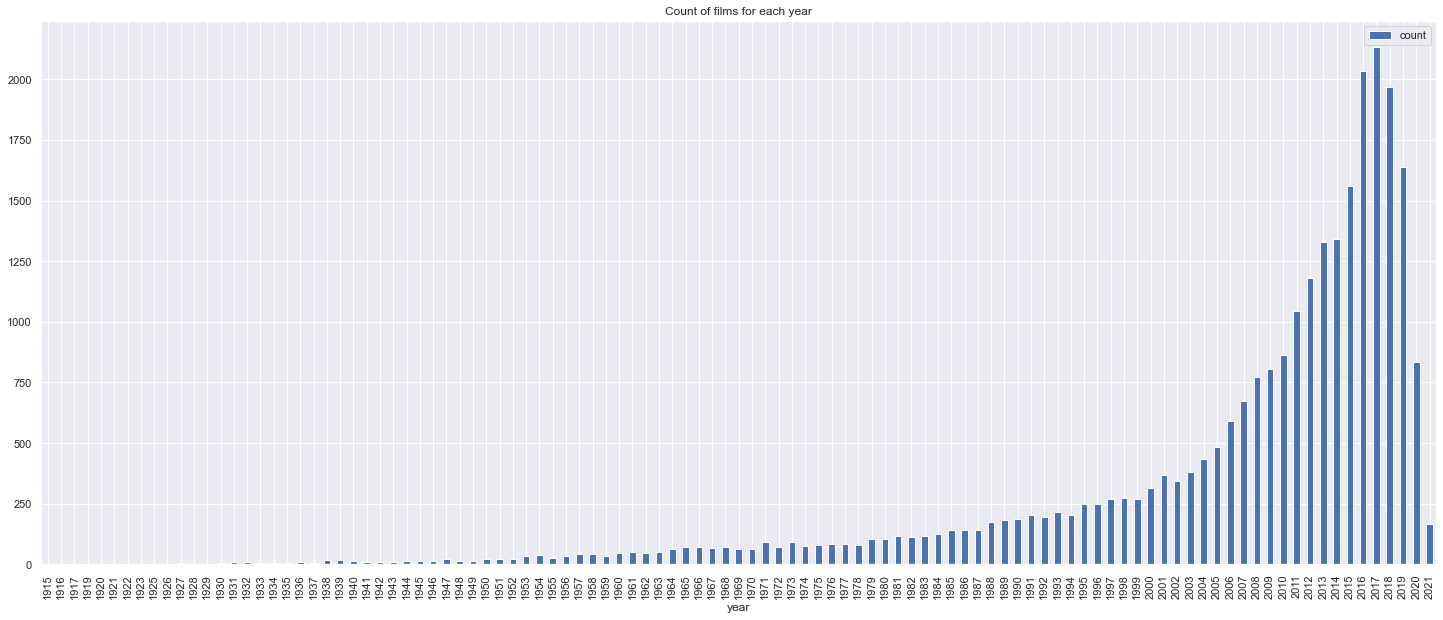

In [37]:
year_table.plot(x = 'year', y = 'count', kind = 'bar', figsize = (25, 10), grid = True, title = 'Count of films for each year')#visualize year_table with method .plot()

In [38]:
def year_inter(row):
  '''divide from year intervals'''
  if 1915 <= row['year'] <= 1960:
    return '1915-1960'
  if 1960 < row['year'] <= 2000:
    return '1961-2000'
  if 2000 < row['year'] <= 2010:
    return '2001-2010'
  if 2010 < row['year'] <= 2021:
    return '2011-2021'

In [39]:
table['year_intervals'] = table.apply(year_inter, axis=1)#implement function year_inter to 'table'

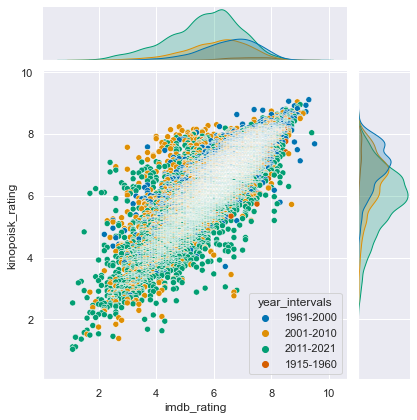

In [40]:
#check ratio of ratings for year intervals
sns.jointplot(data=table, x='imdb_rating', y = 'kinopoisk_rating', hue='year_intervals', palette='colorblind')

In [41]:
table.corr()

,year,imdb_rating,kinopoisk_rating,duration,mean_rating
year,1.000000,-0.328744,-0.382857,-0.122152,-0.367065
imdb_rating,-0.328744,1.000000,0.843172,0.307854,0.971384
kinopoisk_rating,-0.382857,0.843172,1.000000,0.344282,0.958451
duration,-0.122152,0.307854,0.344282,1.000000,0.328741
mean_rating,-0.367065,0.971384,0.958451,0.328741,1.000000


In [42]:
del table['imdb_rating']
del table['kinopoisk_rating']

Ratings have high correlation, then we will use mean_rate for next calculations

In [44]:
year_table['mean_rate'] = table.pivot_table(index = 'year', values = 'mean_rating', aggfunc = 'mean').reset_index()['mean_rating']#create new column with mean of ratings for each year
year_table['mean_duration'] = table.pivot_table(index = 'year', values = 'duration', aggfunc = 'mean').reset_index()['duration']#create new column with mean of duration for each year

<AxesSubplot:xlabel='year'>

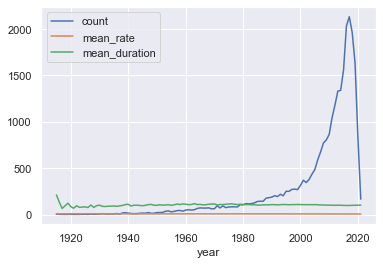

In [45]:
year_table.plot(x = 'year')

In [48]:
# we need to normalize data
from sklearn.preprocessing import StandardScaler
year_stan = pd.DataFrame(StandardScaler().fit_transform(year_table.iloc[:, 1:]))

In [49]:
year_stan.columns = ['count', 'rate', 'duration']
year_stan['year'] = year_table['year']

In [50]:
year_stan.sample(5)

,count,rate,duration,year
84,0.246907,-0.649859,0.230151,2001
22,-0.517972,0.818389,0.282380,1939
42,-0.480926,0.474059,0.772908,1959
43,-0.456956,0.488962,0.530037,1960
61,-0.382865,0.168830,0.263199,1978


<AxesSubplot:xlabel='year'>

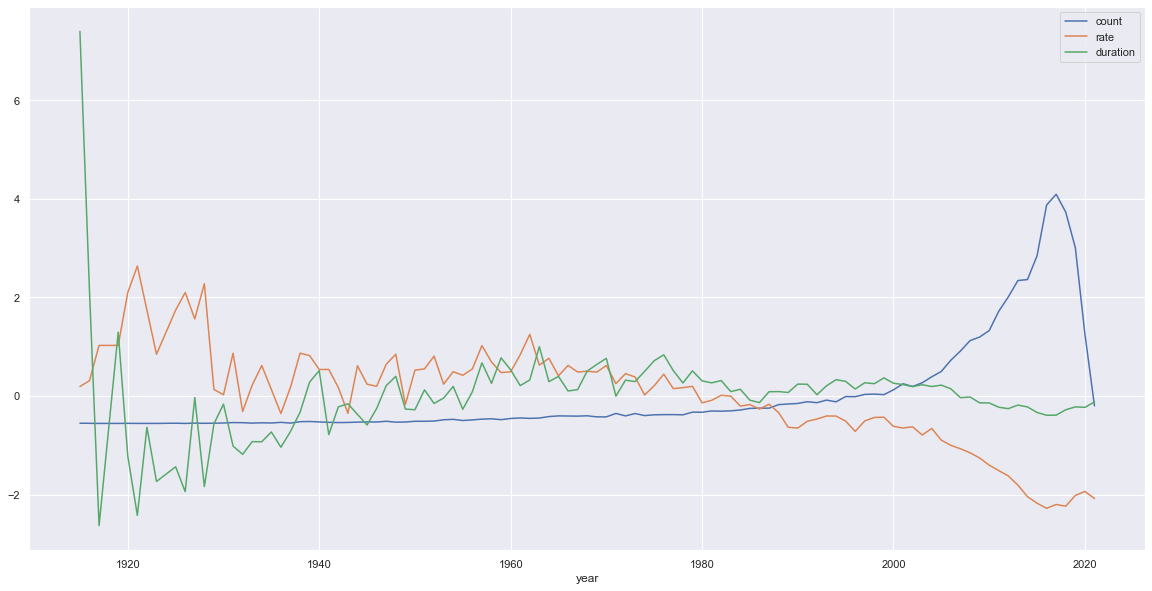

In [51]:
year_stan.plot(x = 'year',figsize = (20, 10))

In [52]:
year_stan.corr()

,count,rate,duration,year
count,1.000000,-0.782254,-0.056622,0.688644
rate,-0.782254,1.000000,-0.133303,-0.833338
duration,-0.056622,-0.133303,1.000000,0.107228
year,0.688644,-0.833338,0.107228,1.000000


Year and rating have high negative correlation(count of films can affect that correlation)

> Country

In [53]:
country_table = table.pivot_table(index = 'country', values = 'title', aggfunc='count').rename(columns = {'title':'count'}).reset_index()
country_table['mean_rate'] = table.pivot_table(index = 'country', values = 'mean_rating', aggfunc = 'mean').reset_index()['mean_rating']

In [54]:
country_table.head()

,country,count,mean_rate
0,Австралия,356,5.898034
1,Австрия,68,6.395588
2,Азербайджан,3,5.433333
3,Албания,2,6.550000
4,Алжир,4,6.050000


In [55]:
cntry_stan = pd.DataFrame(StandardScaler().fit_transform(country_table.iloc[:, 1:]))
cntry_stan.columns = ['count', 'rate']
cntry_stan['country'] = country_table['country']

<AxesSubplot:xlabel='country'>

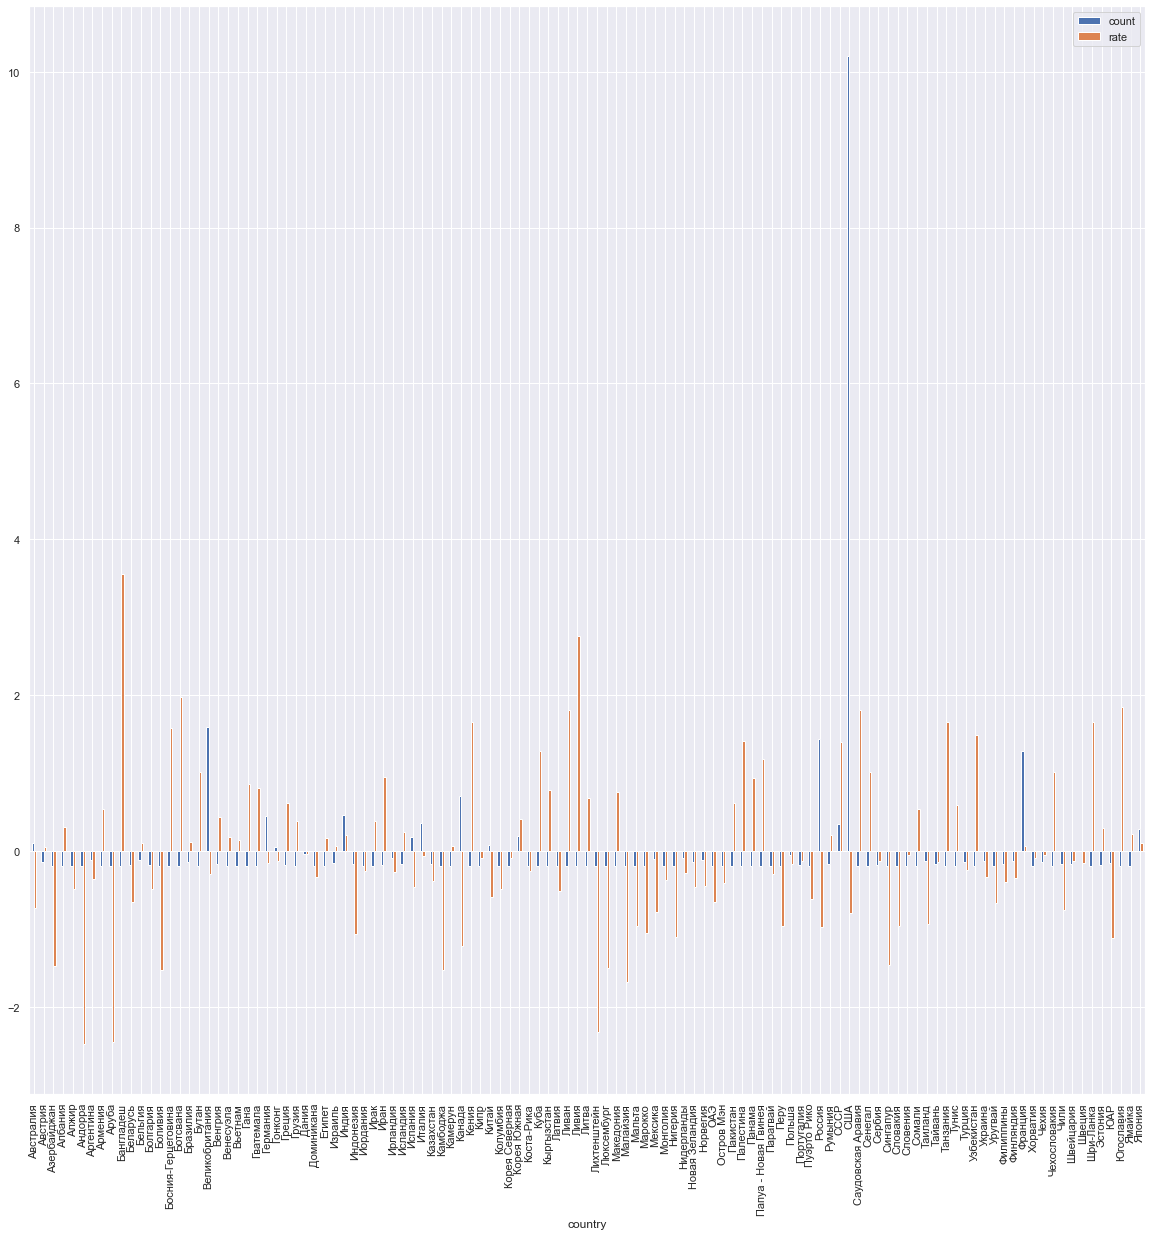

In [60]:
cntry_stan.plot(x = 'country',kind = 'bar', figsize = (20, 20))


In [61]:
cntry_stan.corr()

,count,rate
count,1.000000,-0.100284
rate,-0.100284,1.000000


In [63]:
del table['year_intervals']
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26953 entries, 0 to 27238
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        26953 non-null  object 
 1   year         26953 non-null  int32  
 2   country      26953 non-null  object 
 3   genre        26953 non-null  object 
 4   duration     26953 non-null  int32  
 5   mean_rating  26953 non-null  float64
dtypes: float64(1), int32(2), object(3)
memory usage: 1.2+ MB


In [121]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
table1 = enc.fit_transform(table[['country']]).toarray()
table1 = pd.DataFrame(table1, columns=enc.categories_)

In [172]:
table2 = pd.DataFrame(StandardScaler().fit_transform(table[['year', 'duration', 'mean_rating']]), columns = ['year', 'duration', 'mean_rating'])

In [173]:
table1['year'] = table2['year']
table1['duration'] = table2['duration']
table1['mean_rating'] = table2['mean_rating']

In [66]:
table = table.drop(table[table.genre.isna()].index)
table = table.drop(table[table.genre == '[]'].index)

In [67]:
genres = []
for i in table.loc[:, 'genre']:
    g = i[2:-2].split("', '")
    for j in g:
        if j not in genres:
            genres.append(j)
print(genres)


['Драмы', 'Криминал', 'Детективы', 'Фэнтези', 'Документальные', 'Музыкальные', 'Биографические', 'Мелодрамы', 'Военные', 'Исторические', 'Комедии', 'Приключения', 'Фантастика', 'Семейные', 'Триллеры', 'Боевики', 'Спортивные', 'Познавательные', 'Вестерны', 'Короткометражные', 'Мюзиклы', 'Путешествия', 'Ужасы', 'Детские', 'Арт-хаус', 'Зарубежные', 'Наши', 'Украинские', 'Эротика']


In [68]:
genres_df = pd.DataFrame(columns=genres)

In [69]:
table = table.reset_index()
del table['index']

In [70]:
for i in range(len(table['genre'])):
    for j in genres:
        if j in table.loc[i, 'genre']:
            genres_df.loc[i, j] = 1
        else:
            genres_df.loc[i, j] = 0

In [77]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26952 entries, 0 to 26951
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Драмы             26952 non-null  object
 1   Криминал          26952 non-null  object
 2   Детективы         26952 non-null  object
 3   Фэнтези           26952 non-null  object
 4   Документальные    26952 non-null  object
 5   Музыкальные       26952 non-null  object
 6   Биографические    26952 non-null  object
 7   Мелодрамы         26952 non-null  object
 8   Военные           26952 non-null  object
 9   Исторические      26952 non-null  object
 10  Комедии           26952 non-null  object
 11  Приключения       26952 non-null  object
 12  Фантастика        26952 non-null  object
 13  Семейные          26952 non-null  object
 14  Триллеры          26952 non-null  object
 15  Боевики           26952 non-null  object
 16  Спортивные        26952 non-null  object
 17  Познавательн

In [72]:
genres_df.shape

(26952, 29)

In [129]:
table1 = table1.join(genres_df)
table1

,"(Австралия,)","(Австрия,)","(Азербайджан,)","(Албания,)","(Алжир,)","(Андорра,)","(Аргентина,)","(Армения,)","(Аруба,)","(Бангладеш,)",...,Короткометражные,Мюзиклы,Путешествия,Ужасы,Детские,Арт-хаус,Зарубежные,Наши,Украинские,Эротика
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
for i in ['title', 'country', 'genre']:
    del table1[i]
table1 = table1.dropna()

In [131]:
for i in table1.select_dtypes(include='object').columns:
    table1[i] = table1[i].astype('int')

In [174]:
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26952 entries, 0 to 26951
Columns: 148 entries, ('Австралия',) to mean_rating
dtypes: float64(119), int32(29)
memory usage: 27.5 MB


**Applying LR**

In [175]:
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
lin = LinearRegression()
X = lin.fit(table1.loc[:, ~table1.columns.isin(['mean_rating'])], table1[['mean_rating']])

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [176]:
X.coef_

array([[-2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+09,
        -2.62713880e+09, -2.62713880e+09, -2.62713880e+0

In [178]:
import numpy as np
print(np.dot(X.coef_, table1.loc[20, ~table1.columns.isin(['mean_rating'])]), table1.loc[20, 'mean_rating'])

[-2.6271388e+09] 2.074129553520005


We get strange coeficients, because of high linear collinearity of some columns, so lets apply another linear model with regularization

In [185]:
las = Lasso(alpha = 0.00001)
X_reg = las.fit(table1.loc[:, ~table1.columns.isin(['mean_rating'])], table1[['mean_rating']])

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [186]:
X_reg.coef_

array([-1.78629463e-01, -3.85661653e-02, -3.87620827e-01, -3.78451791e-02,
       -1.08470845e-01, -1.00991351e+00, -6.38798918e-02,  2.63513000e-01,
       -9.43345032e-01,  1.39852662e+00, -1.88451917e-01,  1.68048862e-01,
        4.95952126e-02, -3.96553106e-01,  5.59489510e-01,  2.98327635e-01,
        1.32567387e-01,  1.95701420e-03, -1.56448846e-01,  1.48892330e-01,
        1.81787972e-01,  3.96969721e-01,  4.42871104e-01,  6.22715179e-01,
       -1.28267472e-01,  2.07699328e-02,  2.22354346e-02,  3.56049307e-01,
        4.13659497e-02,  0.00000000e+00, -0.00000000e+00,  1.00550369e-01,
       -2.80424196e-01,  3.51676309e-02, -5.57698253e-02,  4.84420509e-03,
        6.02956658e-01,  1.31574747e-01,  2.80262631e-01, -5.14256894e-02,
       -2.22684430e-01,  7.37162236e-02, -1.85657688e-01, -9.44400661e-03,
       -3.11587901e-01,  5.78303650e-01,  0.00000000e+00, -1.66934798e-01,
       -9.23076833e-04, -0.00000000e+00,  2.59742745e-01,  1.30505842e-02,
       -4.79703871e-02,  

In [187]:
print(np.dot(X_reg.coef_, table1.loc[20, ~table1.columns.isin(['mean_rating'])]), table1.loc[20, 'mean_rating'])

0.5332469444957689 2.074129553520005


Applying SGD

In [221]:
sgd = SGDRegressor(alpha = 0.00001)
X_sgd = sgd.fit(table1.loc[:, ~table1.columns.isin(['mean_rating'])], table1[['mean_rating']])

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
X_sgd = list(X_sgd.coef_)

In [224]:
X_sgd

[-0.0892769732340145,
 0.02530533716218948,
 -0.007904884853223035,
 -0.001917273559865637,
 -0.0024714114080967853,
 -0.0073793554670049,
 0.005322527308934241,
 0.022076229163471555,
 -0.03564610930303173,
 0.010527936117935444,
 -0.008854250819554836,
 0.10308716559971126,
 0.011014506858215324,
 -0.005510903116288868,
 0.008481325522725503,
 0.003741858871216568,
 0.06450081798037126,
 0.001693583612746539,
 -0.08914302220461834,
 0.05216721683724468,
 0.011573490828895456,
 0.02255087970278666,
 0.00424371481642463,
 0.02425265626065089,
 -0.051468338917213,
 0.07374381729786122,
 0.016513020613072936,
 0.017430384844744396,
 0.086863286150176,
 0.0005855666216857245,
 0.0017150647616371718,
 0.05339344987416146,
 -0.16438301999978683,
 0.02748000678871939,
 -0.0015966509793342522,
 0.0017879445180779161,
 0.08561462056637045,
 0.10384902982791343,
 0.06386771373324972,
 0.010997672601528079,
 -0.1663386055836831,
 0.028616915499406804,
 -0.0038965439423032733,
 -0.000924561903510

In [190]:
print(np.dot(X_sgd.coef_, table1.loc[5, ~table1.columns.isin(['mean_rating'])]), table1.loc[5, 'mean_rating'])

1.0461449531621705 2.412015054361796


So, by looking at all coeficients we can accept SGD, to get most valuable of them

Or we can apply PCA to reduce number of dimensions

In [195]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
table_pca = pd.DataFrame(pca.fit_transform(table1.loc[:, ~table1.columns.isin(['mean_rating'])]), columns = ['P1', 'P2', 'P3'])
table_pca

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


,P1,P2,P3
0,1.471150,1.662436,0.389090
1,1.397773,3.852894,0.603534
2,0.039817,1.666509,-0.224796
3,-0.464356,0.893336,-0.261645
4,0.976123,0.653321,-0.245189
...,...,...,...
26947,-0.993693,-0.040239,-0.799496
26948,-1.051136,0.872032,0.703437
26949,-1.265499,-0.388112,0.750430
26950,-1.390559,-0.443557,0.575511


In [214]:
lin_pca = LinearRegression()
X_pca = lin_pca.fit(table_pca, table1[['mean_rating']])

In [215]:
print(np.dot(X_pca.coef_, table_pca.loc[5, :]), table1.loc[5, 'mean_rating'])

[0.8846904] 2.412015054361796


In [210]:
las_pca = Lasso(alpha = 0.001)
X_reg_pca = las_pca.fit(table_pca, table1[['mean_rating']])

In [211]:
print(np.dot(X_reg_pca.coef_, table_pca.loc[5, :]), table1.loc[5, 'mean_rating'])

0.8820928692569738 2.412015054361796


In [212]:
sgd_pca = SGDRegressor(alpha = 0.00001)
X_sgd_pca = sgd_pca.fit(table_pca, table1[['mean_rating']])

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
print(np.dot(X_sgd_pca.coef_, table_pca.loc[5, :]), table1.loc[5, 'mean_rating'])

0.911154817890158 2.412015054361796


In [228]:
coef = {}
for i in range(len(table1.columns)-1):
    coef[table1.columns[i]] =  X_sgd[i]
coef

{('Австралия',): -0.0892769732340145,
 ('Австрия',): 0.02530533716218948,
 ('Азербайджан',): -0.007904884853223035,
 ('Албания',): -0.001917273559865637,
 ('Алжир',): -0.0024714114080967853,
 ('Андорра',): -0.0073793554670049,
 ('Аргентина',): 0.005322527308934241,
 ('Армения',): 0.022076229163471555,
 ('Аруба',): -0.03564610930303173,
 ('Бангладеш',): 0.010527936117935444,
 ('Беларусь',): -0.008854250819554836,
 ('Бельгия',): 0.10308716559971126,
 ('Болгария',): 0.011014506858215324,
 ('Боливия',): -0.005510903116288868,
 ('Босния-Герцеговина',): 0.008481325522725503,
 ('Ботсвана',): 0.003741858871216568,
 ('Бразилия',): 0.06450081798037126,
 ('Бутан',): 0.001693583612746539,
 ('Великобритания',): -0.08914302220461834,
 ('Венгрия',): 0.05216721683724468,
 ('Венесуэла',): 0.011573490828895456,
 ('Вьетнам',): 0.02255087970278666,
 ('Гана',): 0.00424371481642463,
 ('Гватемала',): 0.02425265626065089,
 ('Германия',): -0.051468338917213,
 ('Гонконг',): 0.07374381729786122,
 ('Греция',): 0.

Sum affect of columns

In [235]:
sum(list(coef.values())[:115]) #country

-0.09206079016810509

In [239]:
sum(list(coef.values())[117:145]) #genre

2.6561287767136705

In [240]:
coef['year']

-0.1445434839604939

In [241]:
coef['duration']

0.2372446166704387

# **Conclusion**

1. The number of films is growing over the years, but people prefer to give preference to older films. (Visualization shows that ratings are falling over the years.) 

2. Quantity does not mean quality. 
*   USA has the highest number of films, but the average rating is low.

3. SGD regression algorithm shows, genre has most affect on film rating
(Drama, documentary films has high positive effect, Horror, erotic movies high negative effect)
